In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import unittest
import copy



In [3]:
#import data
df=pd.read_csv('urine_test_data.csv')
df

,Sample_ID,Organism_1,Organism_2,Organism_3,Organism_4,Organism_5,Organism_6,Organism_7,Organism_8,Organism_9,...,Antibiotic_13,Antibiotic_14,Antibiotic_15,Antibiotic_16,Antibiotic_17,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5
0,Sample_0001,675,291,0,204,666,0,0,0,799,...,S,S,R,S,S,0,0,0,0,0
1,Sample_0002,692,377,0,0,0,971,0,0,0,...,R,R,S,S,S,0,1,0,0,0
2,Sample_0003,0,173,0,0,0,25,0,0,0,...,S,R,S,S,S,0,0,0,0,0
3,Sample_0004,811,0,710,0,0,0,0,485,0,...,S,S,R,S,R,0,0,0,0,0
4,Sample_0005,708,553,0,0,0,0,0,0,0,...,S,S,R,S,S,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sample_0996,57,0,0,670,0,0,0,0,0,...,S,S,R,S,S,0,0,0,0,0
996,Sample_0997,221,0,207,0,0,0,506,0,0,...,S,S,R,S,S,0,0,0,0,0
997,Sample_0998,0,0,0,0,0,0,0,0,0,...,S,S,R,R,S,0,0,0,0,0
998,Sample_0999,0,574,0,0,0,0,0,817,0,...,R,S,R,S,S,0,1,0,0,0


In [4]:
#check distribution & central tendency
df.describe()

,Organism_1,Organism_2,Organism_3,Organism_4,Organism_5,Organism_6,Organism_7,Organism_8,Organism_9,Organism_10,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,190.533000,182.748000,120.860000,98.720000,91.23100,69.511000,58.115000,43.15900,37.654000,33.110000,0.31700,0.240000,0.172000,0.097000,0.038000
std,306.930411,297.068063,261.792146,233.038457,233.33755,200.217124,185.643344,157.39008,155.555179,143.820911,0.46554,0.427297,0.377569,0.296106,0.191292
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,350.250000,358.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
max,999.000000,997.000000,999.000000,994.000000,988.00000,998.000000,994.000000,992.00000,998.000000,997.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [5]:
#check for missing data
df.isna().sum()

Sample_ID        0
Organism_1       0
Organism_2       0
Organism_3       0
Organism_4       0
Organism_5       0
Organism_6       0
Organism_7       0
Organism_8       0
Organism_9       0
Organism_10      0
Antibiotic_1     0
Antibiotic_2     0
Antibiotic_3     0
Antibiotic_4     0
Antibiotic_5     0
Antibiotic_6     0
Antibiotic_7     0
Antibiotic_8     0
Antibiotic_9     0
Antibiotic_10    0
Antibiotic_11    0
Antibiotic_12    0
Antibiotic_13    0
Antibiotic_14    0
Antibiotic_15    0
Antibiotic_16    0
Antibiotic_17    0
Gene_1           0
Gene_2           0
Gene_3           0
Gene_4           0
Gene_5           0
dtype: int64

In [6]:
#Initial EDA with ydata_profiling
# profile = ProfileReport(df)
# profile.to_notebook_iframe()


### Task & data visualization
#### - Percentage of R & S for each antibiotic

I decided to use both matplotlib and seaborn because they both integrate well with pandas; also seaborn is quite good for making statistical plots like distributions

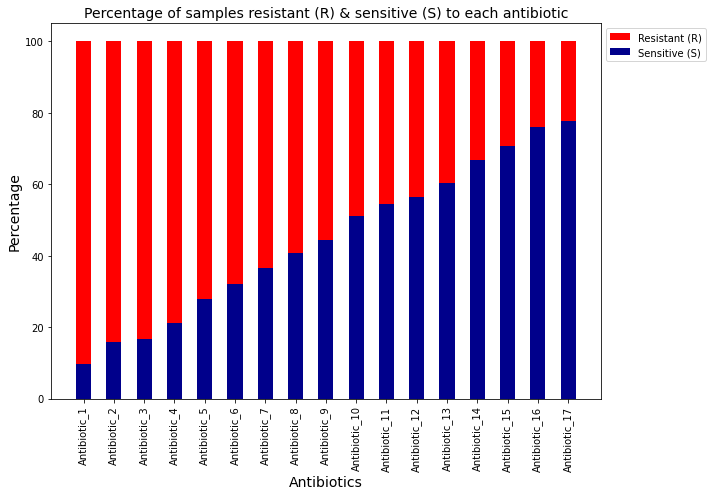

In [7]:
%matplotlib inline
antibiotic_cols = [f'Antibiotic_{i}' for i in range(1, 18)]

# Calculating percentages for R and S for each antibiotic
percentages = {
    'R': [],
    'S': []
}

for col in antibiotic_cols:
    total = len(df[col])
    r_count = sum(df[col] == 'R')
    s_count = sum(df[col] == 'S')

    percentages['R'].append(r_count / total * 100)
    percentages['S'].append(s_count / total * 100)

# Plotting
plt.figure(figsize=(10, 7))
bar_width = 0.5
index = range(len(antibiotic_cols))
plt.bar(index, percentages['R'], bar_width, label='Resistant (R)', color='red', bottom=percentages['S'])
plt.bar(index, percentages['S'], bar_width, label='Sensitive (S)', color='darkblue')

plt.xlabel('Antibiotics',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.title('Percentage of samples resistant (R) & sensitive (S) to each antibiotic',fontsize=14)
plt.xticks(index, antibiotic_cols, rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()


It appears there's an increasing trend of sensitivity across the antibotics (range 1-17)

#### - Presence of each gene across the samples

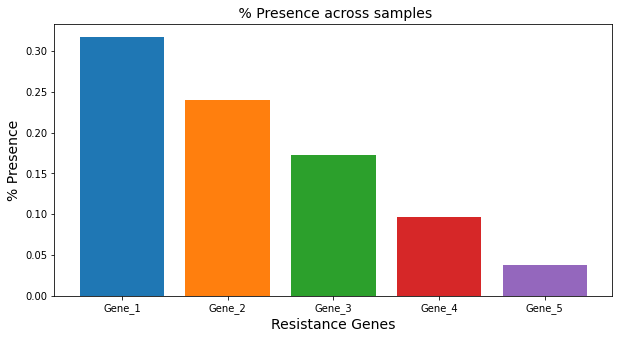

In [8]:
gene_cols = [f'Gene_{i}' for i in range(1, 6)]

# Plotting
plt.figure(figsize=(10, 5))
for col in gene_cols:
    value = df[col].sum()/len(df[col])
    plt.bar(col, value)

plt.title(' % Presence across samples',fontsize=14)
plt.xlabel('Resistance Genes',fontsize=14)
plt.ylabel('% Presence',fontsize=14)
plt.show()

#### - Distribution of cell counts

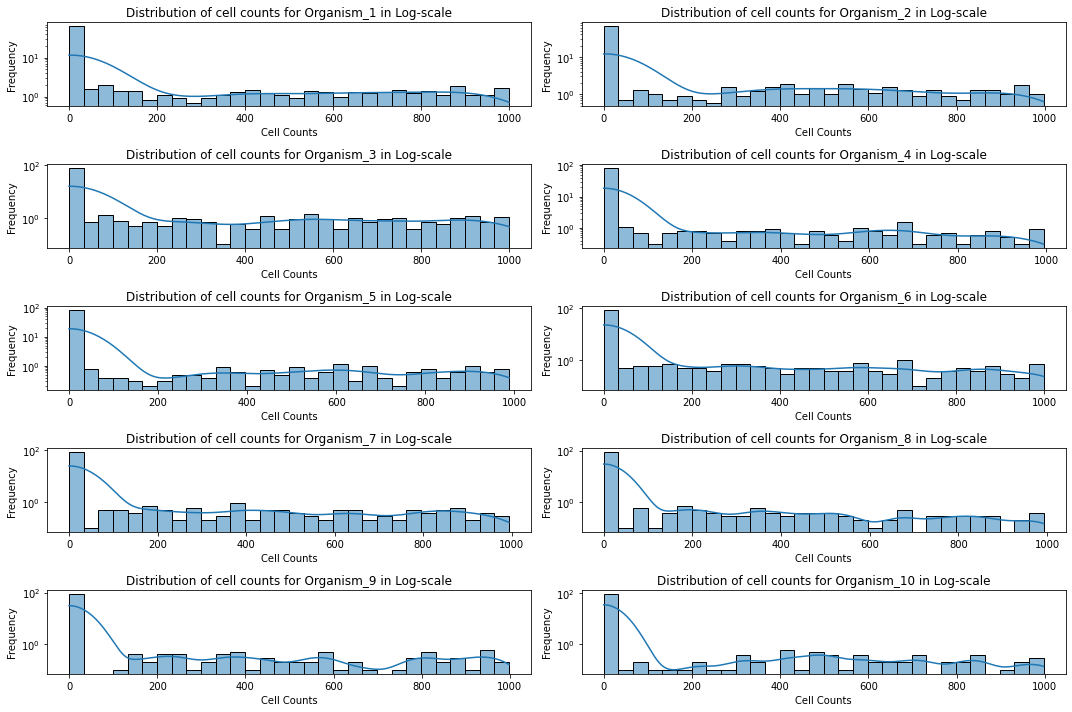

In [9]:
# List of organism columns
organism_cols = [f'Organism_{i}' for i in range(1, 11)]

# Using Seaborn for distribution plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(organism_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[col], kde=True, bins=30,stat="percent")
    plt.yscale('log')
    plt.title(f'Distribution of cell counts for {col} in Log-scale')
    plt.xlabel('Cell Counts')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Unit testing

I decided to do the unit testing here rather than creating a python file for easy review by Jim

In [10]:
#create a copy of the df for unit testing
existing_df=copy.deepcopy(df)

In [11]:
def add_data(old_df, new_data):
    """
    Adds new data to an existing dataframe.
    
    Args:
    - old_df: Original dataframe.
    - new_data (dict): New data to be added.
    
    Returns:
    - Updated dataframe.
    """
    new_df = pd.DataFrame([new_data])
    return df.append(new_df, ignore_index=True)

In [12]:
class TestDataAddition(unittest.TestCase):
    
    def setUp(self):
        """Set up test case"""
        self.df = existing_df
        
        self.new_data = {'Sample_ID': 'Sample_1001',
                         'Organism_1': 0,
                         'Organism_2': 523,
                         'Organism_3': 505,
                         'Organism_4': 311,
                         'Organism_5': 0,
                         'Organism_6': 0,
                         'Organism_7': 0,
                         'Organism_8': 0,
                         'Organism_9': 0,
                         'Organism_10': 0,
                         'Antibiotic_1': 'S',
                         'Antibiotic_2': 'R',
                         'Antibiotic_3': 'R',
                         'Antibiotic_4': 'S',
                         'Antibiotic_5': 'S',
                         'Antibiotic_6': 'R',
                         'Antibiotic_7': 'R',
                         'Antibiotic_8': 'R',
                         'Antibiotic_9': 'R',
                         'Antibiotic_10': 'S',
                         'Antibiotic_11': 'R',
                         'Antibiotic_12': 'R',
                         'Antibiotic_13': 'S',
                         'Antibiotic_14': 'S',
                         'Antibiotic_15': 'R',
                         'Antibiotic_16': 'R',
                         'Antibiotic_17': 'S',
                         'Gene_1': 0,
                         'Gene_2': 0,
                         'Gene_3': 1,
                         'Gene_4': 0,
                         'Gene_5': 1}
        self.updated_df= add_data(self.df, self.new_data)
        
    def test_add_data_1(self):
        """Check if the new data was added as the last row"""
        for column, value in self.new_data.items():
            self.assertEqual(self.updated_df.iloc[-1][column], value)
    def test_add_data_2(self):      
        """Check if the number of rows increased by 1 """
        self.assertEqual(len(self.updated_df), len(self.df) + 1)
    def test_add_data_3(self): 
        """Check if number of columns remains the same"""
        self.assertEqual(len(self.updated_df.columns), len(self.df.columns))

In [13]:
#execute test cases
unittest.main(argv=[''], verbosity=2, exit=False)

test_add_data_1 (__main__.TestDataAddition)
Check if the new data was added as the last row ... <ipython-input-11-8c9b029a8b72>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(new_df, ignore_index=True)
ok
test_add_data_2 (__main__.TestDataAddition)
Check if the number of rows increased by 1 ... <ipython-input-11-8c9b029a8b72>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(new_df, ignore_index=True)
ok
test_add_data_3 (__main__.TestDataAddition)
Check if number of columns remains the same ... <ipython-input-11-8c9b029a8b72>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(new_df, ignore_index=True)
ok

------------------------------------------------------------------

Passed All 3 tests